## Quinn

In [70]:
#Line chart of sightings over the year

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
geocoded_data_file= pd.read_csv('../Bootcamp-Project-1/bfro_reports_geocoded.csv')
location_data_file= pd.read_csv('../Bootcamp-Project-1/bfro_locations.csv')
main_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
main_json.head()

C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\991146047.py:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  main_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\991146047.py:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  main_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\991146047.py:9: FutureWa

,YEAR,SEASON,MONTH,DATE,STATE,COUNTY,LOCATION_DETAILS,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,REPORT_CLASS,A_&_G_References
0,2000,Summer,June,23,Wyoming,Washakie County,"We were on our way to Rapid City, so we were h...",Tensleep,SR16,I am not sure how relevant this report will be...,Nothing,There was one passenger in the car and a drive...,None,"It was around Noon, bright Sunny day.","Mountainous Forest, on very steep hills, numer...",798.0,Class B,NaN
1,2005,Winter,December,12-03-05,West Virginia,Wyoming County,"Heading to the deep mine Poca #2, the airshaft...",AMGIO (Left Fork Mines),Mine haul road,I don't know if what I saw was two bigfoots or...,Only when the first one did this clapping moti...,NO,NO,The time was exactly 2:40 PM. The weather cond...,There was a little stream and a lot of trees k...,13237.0,Class A,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,2005,Fall,October,8,Vermont,Windsor County,It's off Rt 100 outside of Ludlow Vermont. It ...,Ludlow,Tyson Road,"My family and I went to Ludlow, Vermont for Co...","The day before we had driven the same area, di...",There were three of us in the car. Only two of...,I've been told that the locals just warn kids ...,It was evening but with the moon and the headl...,At that point the road is bordered by woods an...,13285.0,Class A,NaN


In [71]:
#Data Cleaning


#I only really care about a few of these pieces of data in constructing my dataset as I am only trying to show bigfoot sightings by year and report class,
#so I only want to clean those so I can retain as much data as I can

clean_main_json = main_json.dropna(subset=['YEAR', 'REPORT_CLASS'])

#Some columns include things like "1974 or 1975". I will remove these as non-numeric values and use coercion to convert errors to NaN
clean_main_json['YEAR'] = pd.to_numeric(clean_main_json['YEAR'], errors='coerce')

# Drop new NaN rows in YEAR from
clean_main_json = clean_main_json.dropna(subset=['YEAR'])

# Convert YEAR to integer using .loc to avoid SettingWithCopyWarning
clean_main_json.loc[:, 'YEAR'] = clean_main_json['YEAR'].astype(int)

# Filter out any of the year values that don't make a ton of sense (e.g., probably those outside the range 1910-2024)
clean_main_json = clean_main_json[(clean_main_json['YEAR'] >= 1900) & (clean_main_json['YEAR'] <= 2024)]

# Retain only the relevant columns for analysis
clean_main_json = clean_main_json[['YEAR', 'REPORT_CLASS']]

# Print the cleaned dataframe summary to doublecheck data
print(clean_main_json.info())
print(clean_main_json.head())

<class 'pandas.core.frame.DataFrame'>
Index: 4705 entries, 0 to 5545
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          4705 non-null   float64
 1   REPORT_CLASS  4705 non-null   object 
dtypes: float64(1), object(1)
memory usage: 110.3+ KB
None
     YEAR REPORT_CLASS
0  2000.0      Class B
1  2005.0      Class A
4  2005.0      Class A
5  1984.0      Class A
7  1996.0      Class A


C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\942574058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_main_json['YEAR'] = pd.to_numeric(clean_main_json['YEAR'], errors='coerce')


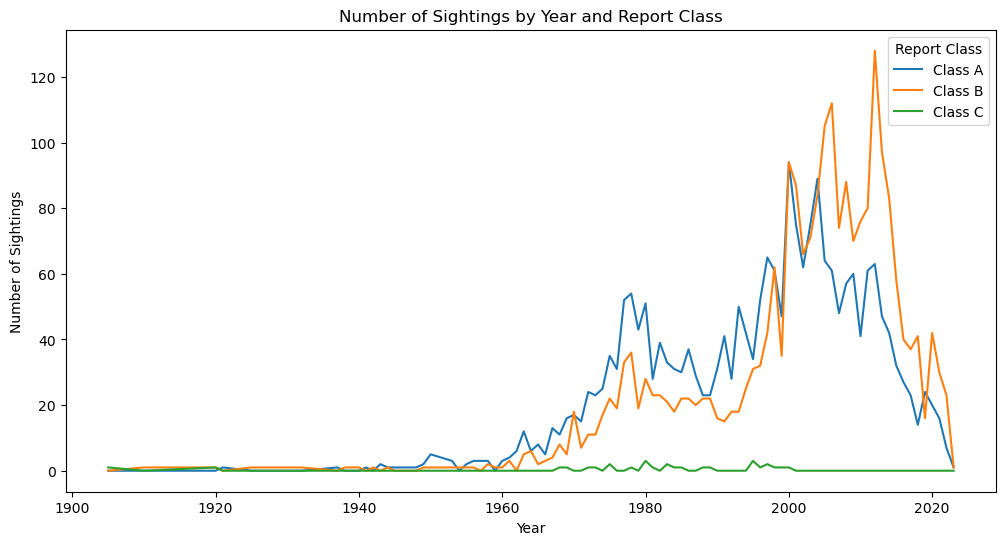

In [72]:
# I need to find sightings by year and class, and this can be done through using a group by function
sightings_by_year = clean_main_json.groupby(['YEAR', 'REPORT_CLASS']).size().reset_index(name='counts')

# Pivot the data to get dates on right axis
sightings_pivot = sightings_by_year.pivot(index='YEAR', columns='REPORT_CLASS', values='counts').fillna(0)

# Plot the data
sightings_pivot.plot(kind='line', figsize=(12, 6))
plt.title('Number of Sightings by Year and Report Class')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.legend(title='Report Class')
plt.show()

## Kat

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data bfro_reports_geogoded.csv. This is the combined data which has the states and classifcation. 
bf_geocode= pd.read_csv('../Bootcamp-Project-1/bfro_reports_geocoded.csv')

In [74]:
# Display the first few rows
print(bf_geocode.head())

#Removing the other columnns I do not need
bf_geocode = bf_geocode[['state', 'classification']]

#Checking to see the dataset
print(bf_geocode.head())

                                            observed  \
0  I am not sure how relevant this report will be...   
1  I don't know if what I saw was two bigfoots or...   
2  My family and I went to Ludlow, Vermont for Co...   
3  It was spring break 1984 and I was 16 at the t...   
4  It was the winter of 1996 and we were on our w...   

                                    location_details           county  \
0  We were on our way to Rapid City, so we were h...  Washakie County   
1  Heading to the deep mine Poca #2, the airshaft...   Wyoming County   
2  It's off Rt 100 outside of Ludlow Vermont. It ...   Windsor County   
3  Wythe county Virginia near Wytheville, looking...     Wythe County   
4  Hwy 182, Wood County Between Quitman, Texas an...      Wood County   

           state  season                                              title  \
0        Wyoming  Summer                                                NaN   
1  West Virginia  Winter  Report 13237: Daylight sighting near an 

In [75]:
# Get the unique states in the 'state' column
unique_states = bf_geocode['state'].unique()

print(unique_states) #checking if the states are spelled correctly 

['Wyoming' 'West Virginia' 'Vermont' 'Virginia' 'Texas' 'Tennessee'
 'South Carolina' 'Rhode Island' 'Pennsylvania' 'Oregon' 'Oklahoma' 'Ohio'
 'New York' 'Utah' 'Washington' 'Wisconsin' 'South Dakota' 'Nevada'
 'New Jersey' 'New Hampshire' 'Nebraska' 'North Dakota' 'New Mexico'
 'North Carolina' 'Montana' 'Mississippi' 'Missouri' 'Minnesota'
 'Michigan' 'Maine' 'Maryland' 'Massachusetts' 'Louisiana' 'Kentucky'
 'Kansas' 'Indiana' 'Illinois' 'Idaho' 'Georgia' 'Iowa' 'Florida'
 'Delaware' 'Connecticut' 'California' 'Arizona' 'Arkansas' 'Alabama'
 'Alaska' 'Colorado']


In [76]:
# Define regions by state
west_states = ['Alaska', 'Arizona', 'California', 'Hawaii', 'Idaho','Colorado', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Oregon', 'Washington', 'Wyoming']
midwest_states = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
south_states = ['Alabama', 'Arkansas', 'Delaware', 'District of Columbia','Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
north_east_states = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

def assign_region(state):
    if state in west_states:
        return 'West'
    elif state in midwest_states:
        return 'Midwest'
    elif state in south_states:
        return 'South'
    elif state in north_east_states:
        return 'Northeast'
    else:
        return 'Other'

In [77]:
#Create another column called region
bf_geocode['region'] = bf_geocode['state'].apply(assign_region)

# Display the first few rows to verify
print(bf_geocode.head())

           state classification     region
0        Wyoming        Class B       West
1  West Virginia        Class A      South
2        Vermont        Class A  Northeast
3       Virginia        Class A      South
4          Texas        Class A      South


In [78]:
#Check to see how many rows there are
total_states = bf_geocode['state'].shape[0]

print("Total number of entries in the 'state' column:", total_states)

#Check to see how many rows there are in 'region' column
total_region = bf_geocode['region'].shape[0]

print("Total number of entries in the 'region' column:", total_region)

Total number of entries in the 'state' column: 5082
Total number of entries in the 'region' column: 5082


In [79]:
#Total number of sightings in each region
print(bf_geocode['region'].value_counts())

#As well check to see if there is any categorized as 'other'

region
West         1797
South        1594
Midwest      1292
Northeast     399
Name: count, dtype: int64


In [80]:
# Count sightings by region and classification
region_classification_counts = bf_geocode.groupby(['region', 'classification']).size()

# Display the result
print(region_classification_counts)

region     classification
Midwest    Class A           641
           Class B           645
           Class C             6
Northeast  Class A           179
           Class B           219
           Class C             1
South      Class A           885
           Class B           699
           Class C            10
West       Class A           797
           Class B           987
           Class C            13
dtype: int64


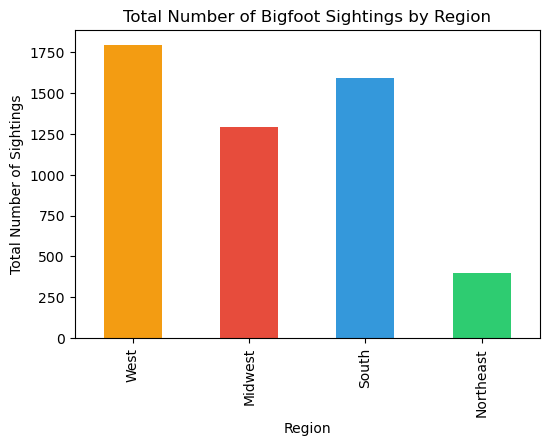

<Figure size 640x480 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt

# Convert the Series to a DataFrame
region_classification_df =region_classification_counts.reset_index(name='count')

# Sum the counts for each region
total_sightings_by_region =region_classification_df.groupby('region')['count'].sum()

# Define the desired order of regions
desired_order =['West','Midwest','South','Northeast']

# Reorder the DataFrame according to the desired order
total_sightings_by_region =total_sightings_by_region.reindex(desired_order)

colors = {
    'West': '#f39c12',      # Sunflower Yellow
    'Midwest': '#e74c3c',   # Tomato Red
    'South': '#3498db',     # Sky Blue
    'Northeast': '#2ecc71'  # Emerald Green
}

# Create the bar chart with region-specific colors
total_sightings_by_region.plot(kind='bar', figsize=(6, 4), color=[colors[region] for region in total_sightings_by_region.index])

# Add titles and labels
plt.title('Total Number of Bigfoot Sightings by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Sightings')

# Show the plot
plt.show()

# Save the plot as an image file
plt.savefig('bigfoot_regions_US.png', dpi=300, bbox_inches='tight')


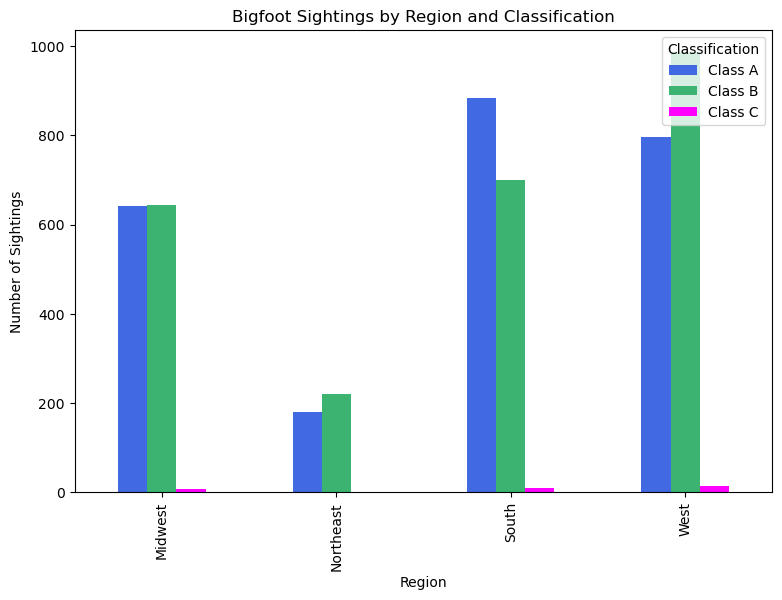

In [82]:
# Define colors for each classification
classification_colors = ['royalblue', 'mediumseagreen', 'fuchsia']

# Pivot the DataFrame so that classifications become columns
pivot_df = region_classification_df.pivot(index='region', columns='classification', values='count').fillna(0)

# Create the grouped bar chart
pivot_df.plot(kind='bar', figsize=(9, 6), color=classification_colors)

# Add titles and labels
plt.title('Bigfoot Sightings by Region and Classification')
plt.xlabel('Region')
plt.ylabel('Number of Sightings')
plt.legend(title='Classification', loc='upper right')

# Show the plot
plt.show()

In [83]:
# Save the plot as an image file
plt.savefig('bigfoot_region_classification.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

## Mackenzie

In [84]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

bf_geocode= pd.read_csv('../Bootcamp-Project-1/bfro_reports_geocoded.csv')
bf_reports= pd.read_csv('../Bootcamp-Project-1/bfro_locations.csv')
bf_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)

bf_json.head()

C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\2999612629.py:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  bf_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\2999612629.py:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  bf_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\2999612629.py:8: FutureWar

,YEAR,SEASON,MONTH,DATE,STATE,COUNTY,LOCATION_DETAILS,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,REPORT_CLASS,A_&_G_References
0,2000,Summer,June,23,Wyoming,Washakie County,"We were on our way to Rapid City, so we were h...",Tensleep,SR16,I am not sure how relevant this report will be...,Nothing,There was one passenger in the car and a drive...,None,"It was around Noon, bright Sunny day.","Mountainous Forest, on very steep hills, numer...",798.0,Class B,NaN
1,2005,Winter,December,12-03-05,West Virginia,Wyoming County,"Heading to the deep mine Poca #2, the airshaft...",AMGIO (Left Fork Mines),Mine haul road,I don't know if what I saw was two bigfoots or...,Only when the first one did this clapping moti...,NO,NO,The time was exactly 2:40 PM. The weather cond...,There was a little stream and a lot of trees k...,13237.0,Class A,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,2005,Fall,October,8,Vermont,Windsor County,It's off Rt 100 outside of Ludlow Vermont. It ...,Ludlow,Tyson Road,"My family and I went to Ludlow, Vermont for Co...","The day before we had driven the same area, di...",There were three of us in the car. Only two of...,I've been told that the locals just warn kids ...,It was evening but with the moon and the headl...,At that point the road is bordered by woods an...,13285.0,Class A,NaN


In [85]:
#Mackenzie- bar charts comparing days of the week and seasons etc.
bf_json.replace("NaN", np.nan, inplace=True)
clean_json2 = bf_json.dropna(how='any')

clean_json2.head()

,YEAR,SEASON,MONTH,DATE,STATE,COUNTY,LOCATION_DETAILS,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,REPORT_CLASS,A_&_G_References
54,2000,Summer,June,13,Washington,Yakima County,Unmarked campsite on right side just past the ...,Cliffdell,FR 174,We showed up and set up camp around 5:00pm. St...,Bird flying overhead seeming to be protective ...,"3, all of us sitting around the campfire.",Report #382 on your list.,Around 9:00pm getting dark cool summer evening.,Forest.,1462.0,Class B,"Pg. 49, B6"
62,2001,Summer,August,8,Washington,Yakima County,Go past bumping road and head up the dirt trai...,Naches,bumping road,First off I am not a true beliver in BigFoot. ...,No,Yes my two friends Shawn K. and Chris. Z.,Just from your web site,"After night fall on both times, around 50 degr...","Thick forest, very clean up there because it i...",11702.0,Class B,Pg 49 C5
387,1998,Summer,July,July 11th,Ohio,Hocking County,"Take State Route 93 north out of Logan, turn l...","Logan, Ohio",Just off of Bear Run Road. Three miles from S...,We went out to an area off of State Route 93 l...,Nothing.,There was three of us but I was the only one w...,Never heard of anything unusual before.,It had rained in the morning but still turned ...,Very wooded and hilly. Typical Hocking County.,378.0,Class A,"Ohio Atlas and Gazetteer (DeLorme Series), go ..."
528,2002,Winter,December,12-21-2002,Oklahoma,Nowata County,Directions are:From Highway 75 North of Bartle...,"Wann,Oklahoma",Highway 10,"Hello,I drive a delivery truck to Kansas 3 tim...",A few days after the sighting I also witnessed...,2. Myself and my 12 year old son.,Yes several which date back as far as 1915,Morning. It was about 30 minutes after sunrise.,Open winter wheat field with a small narrow tr...,5620.0,Class A,"Delorme Oklahoma Atlas, page 26, B-8"
553,2000,Winter,February,Feb 2000,Oklahoma,Le Flore County,The town dump is located on the north side of ...,Honobia,Indian Hwy.,I found what was left of a black and tan coonh...,About a week or two earlier I had found a fres...,I was alone and looking for clues to sasquatch...,There were reports of sasquatches getting food...,The weather was bright and sunny and cold. The...,This area is in the Ouachita National Forest. ...,1888.0,Class B,"Delorme, Oklahoma page 57, I-6"


C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\4279322012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_json2['MONTH'] = (


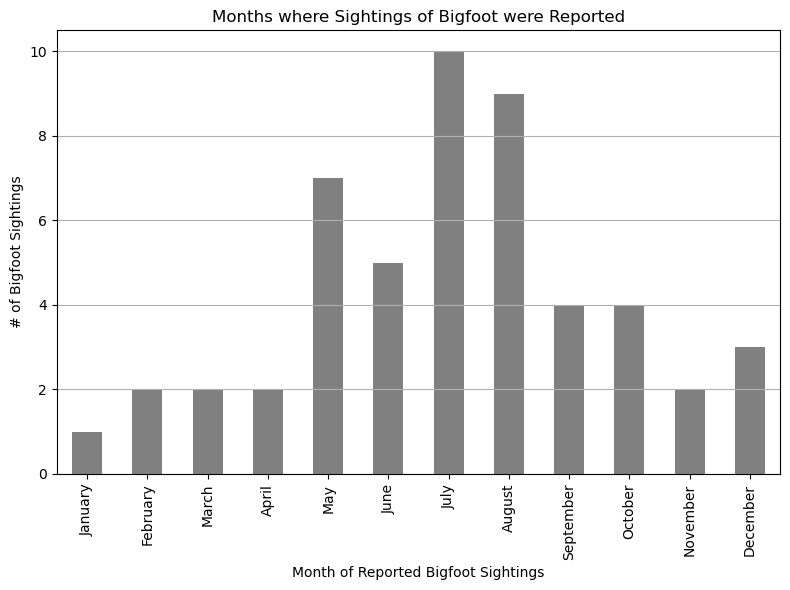

In [86]:
# Convert 'MONTH' to numeric if it's an object type and count occurrences
clean_json2['MONTH'] = (
    pd.to_datetime(clean_json2['MONTH'], format='%B', errors='coerce').dt.month 
    if clean_json2['MONTH'].dtype == 'object' 
    else clean_json2['MONTH']
)

# Count occurrences and map month numbers to names
months_count = clean_json2['MONTH'].value_counts().reindex(range(1, 13), fill_value=0)
months_count.index = months_count.index.map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Plotting the bar chart
plt.figure(figsize=(8, 6))
months_count.plot(kind='bar', color='gray')
plt.title('Months where Sightings of Bigfoot were Reported')
plt.xlabel('Month of Reported Bigfoot Sightings')
plt.ylabel('# of Bigfoot Sightings')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [87]:
cleaned_report = bf_reports.dropna(how='any')
cleaned_report.head()

,number,title,classification,timestamp,latitude,longitude
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.5000,-142.9000
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.1872,-132.7982
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.2035,-132.8202
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.9375,-141.5667
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.0595,-149.7853


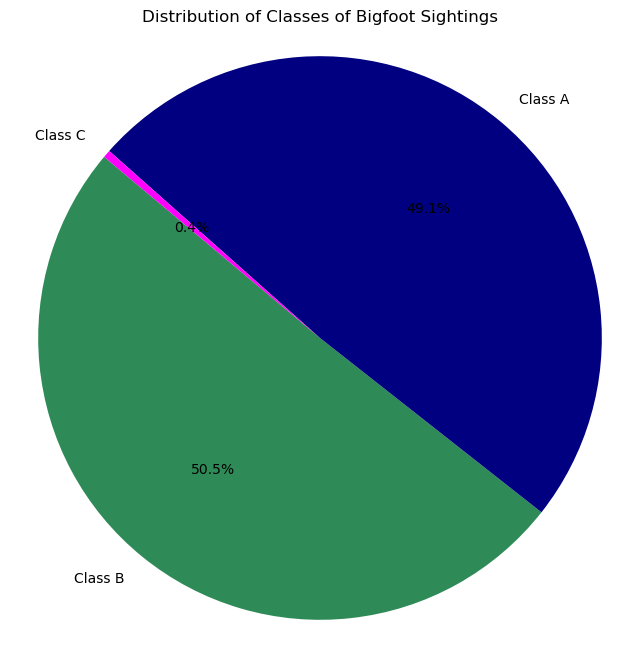

In [88]:
class_distribution = cleaned_report['classification'].value_counts()

colors = ['Seagreen', 'Navy', 'fuchsia']
# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Distribution of Classes of Bigfoot Sightings')
plt.gca().set_facecolor('None')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

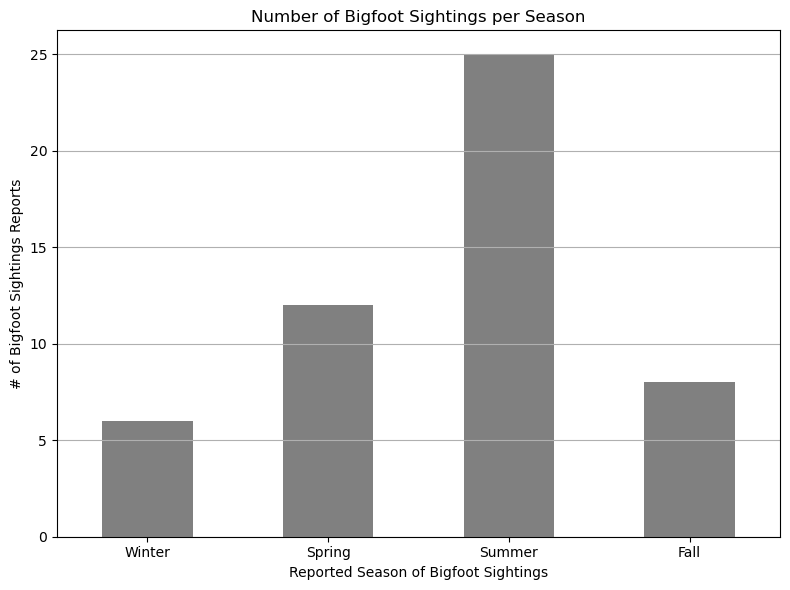

In [89]:
seasons_count = clean_json2['SEASON'].value_counts()

# Reindex to ensure all seasons are represented (optional, as seasons usually are fixed)
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasons_count = seasons_count.reindex(seasons_order, fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
seasons_count.plot(kind='bar', color='gray')
plt.title('Number of Bigfoot Sightings per Season')
plt.xlabel('Reported Season of Bigfoot Sightings')
plt.ylabel('# of Bigfoot Sightings Reports')
plt.xticks(rotation=0)  # Adjust rotation for better readability if needed
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [90]:
bf_reports.head()

,number,title,classification,timestamp,latitude,longitude
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.5000,-142.9000
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.1872,-132.7982
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.2035,-132.8202
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.9375,-141.5667
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.0595,-149.7853


In [91]:
import pandas as pd

# Load the DataFrame
import pandas as pd

# Load the DataFrame and drop NaN values
activities_df = pd.read_csv('../Bootcamp-Project-1/bfro_reports_geocoded.csv').dropna()

# Define keyword groups
keyword_groups = {
    'Hunting': ['hunt', 'hunting', 'hunters', 'hunted'],
    'Hiking': ['hiking', 'hike', 'hiked', 'walking', 'running'],
    'Driving': ['drive', 'driving', 'drove', 'car', 'van', 'truck', 'road'],
    'Fishing': ['fishing', 'fish', 'fished'],
    'Camping': ['camp', 'camping', 'tent'],
}

# Define the column to search for keywords
column_name = 'observed'  # Update with your actual column name

# Create a new column for each keyword group count
for group, keywords in keyword_groups.items():
    activities_df[f'{group}_count'] = activities_df[column_name].str.lower().str.count('|'.join(keywords))

# Calculate total counts for each keyword group
total_counts = activities_df[[f'{group}_count' for group in keyword_groups]].sum()

# Display total counts
print(total_counts)

Hunting_count     62
Hiking_count     119
Driving_count    318
Fishing_count     34
Camping_count    159
dtype: int64


In [92]:
# Load the data and drop rows with missing values
locations_df = pd.read_csv('../Bootcamp-Project-1/bfro_reports_geocoded.csv').dropna()

# Define keyword groups
keyword_locations_groups = {
    'Woods': ['woods', 'forest'],
    'Window': ['yard'],
    'Trail': ['trail'],
    'Park': ['park'],
    'Field': ['field'],
    'Road': ['road'],
    'River': ['river']
}

# Define the column to search for keywords
column_name = 'observed'  # Update with your actual column name

# Count occurrences of each keyword group using str.contains with regex
for group, keywords in keyword_locations_groups.items():
    locations_df[f'{group}_count'] = locations_df[column_name].str.lower().str.contains('|'.join(keywords), na=False).astype(int)

# Get total counts for each keyword group
total_keyword_counts = locations_df[[f'{group}_count' for group in keyword_locations_groups]].sum()

# Display the total counts for each keyword group
print(total_keyword_counts)

Woods_count     57
Window_count    36
Trail_count     24
Park_count      24
Field_count     12
Road_count      53
River_count     15
dtype: int64


## Oumar

In [93]:
import pandas as pd
import numpy as np
import json
bf_geocode= pd.read_csv('../Bootcamp-Project-1/bfro_reports_geocoded.csv')
bf_reports= pd.read_csv('../Bootcamp-Project-1/bfro_locations.csv')
bf_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
bf_json.head()

C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\1150020646.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  bf_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\1150020646.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  bf_json=pd.read_json('../Bootcamp-Project-1/bfro_reports.json',encoding='utf-8',lines=True)
C:\Users\wooll\AppData\Local\Temp\ipykernel_38804\1150020646.py:6: FutureWar

,YEAR,SEASON,MONTH,DATE,STATE,COUNTY,LOCATION_DETAILS,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,REPORT_CLASS,A_&_G_References
0,2000,Summer,June,23,Wyoming,Washakie County,"We were on our way to Rapid City, so we were h...",Tensleep,SR16,I am not sure how relevant this report will be...,Nothing,There was one passenger in the car and a drive...,None,"It was around Noon, bright Sunny day.","Mountainous Forest, on very steep hills, numer...",798.0,Class B,NaN
1,2005,Winter,December,12-03-05,West Virginia,Wyoming County,"Heading to the deep mine Poca #2, the airshaft...",AMGIO (Left Fork Mines),Mine haul road,I don't know if what I saw was two bigfoots or...,Only when the first one did this clapping moti...,NO,NO,The time was exactly 2:40 PM. The weather cond...,There was a little stream and a lot of trees k...,13237.0,Class A,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,2005,Fall,October,8,Vermont,Windsor County,It's off Rt 100 outside of Ludlow Vermont. It ...,Ludlow,Tyson Road,"My family and I went to Ludlow, Vermont for Co...","The day before we had driven the same area, di...",There were three of us in the car. Only two of...,I've been told that the locals just warn kids ...,It was evening but with the moon and the headl...,At that point the road is bordered by woods an...,13285.0,Class A,NaN


In [94]:
import pandas as pd
bfro_data = pd.read_csv("bfro_locations.csv")
import hvplot.pandas

In [95]:
bfro_data.head()

,number,title,classification,timestamp,latitude,longitude
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.5000,-142.9000
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.1872,-132.7982
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.2035,-132.8202
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.9375,-141.5667
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.0595,-149.7853


In [96]:
Data = {
    'latitude': [25.0, 30.0, 35.0, 40.0, 45.0],
    'longitude': [-140.0, -120.0, -100.0, -80.0, -60.0]
}

# Create a DataFrame 'df' from the sample data
df = pd.DataFrame(bfro_data)

# Define latitude and longitude ranges for filtering
min_latitude = 24.396308  
max_latitude = 83.23324    
min_longitude = -141.0     
max_longitude = -52.6      

# Filter the dataset based on latitude and longitude ranges
filtered_df = df[
    (df['latitude'] >= min_latitude) & (df['latitude'] <= max_latitude) &
    (df['longitude'] >= min_longitude) & (df['longitude'] <= max_longitude)
]

# Extract only the latitude and longitude columns
coordinates_df = filtered_df[['latitude', 'longitude', 'classification']]

# Display the filtered coordinates
coordinates_df

,latitude,longitude,classification
1,55.18720,-132.79820,Class A
2,55.20350,-132.82020,Class A
8,32.31435,-85.16235,Class A
9,33.28375,-87.32655,Class A
10,34.95605,-86.45590,Class A
...,...,...,...
4304,31.22333,-94.96611,Class C
4305,47.47745,-121.04150,Class C
4306,47.57778,-124.29330,Class C
4307,47.51030,-122.04560,Class C


In [97]:
# configure map plot_1
maplot_1 = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "classification",
    cmap = ["navy", "seagreen", "fuchsia"]
)
maplot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (classification)

## Jacob

In [98]:
import scipy.stats as stats
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv("bfro_reports_geocoded.csv")
# Reducing dataframe to weather only columns
weatherData = data.loc[:,['classification','temperature_high', 'temperature_mid', 'temperature_low', 'dew_point',
       'humidity', 'cloud_cover', 'moon_phase', 'precip_intensity', 'visibility',
       'precip_probability', 'pressure','conditions', 'wind_bearing', 'wind_speed']]
weatherData.head()

,classification,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,visibility,precip_probability,pressure,conditions,wind_bearing,wind_speed
0,Class B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Class A,37.8,29.5,21.6,17.5,61.7,66.7,0.07,0.204,9.3,100.0,1018.7,"Snow, Rain, Partially cloudy",168.1,17.1
2,Class A,64.3,51.9,45.9,49.3,90.6,100.0,0.19,3.208,5.0,100.0,1011.8,"Rain, Overcast",356.2,7.6
3,Class A,59.0,47.8,37.0,28.1,49.2,76.2,0.25,0.000,13.0,0.0,1020.9,Partially cloudy,107.3,11.5
4,Class A,75.3,71.4,68.1,58.6,64.7,52.9,0.43,NaN,10.5,0.0,NaN,Partially cloudy,180.4,20.8


In [99]:
# Cleaning data - eliminating rows with NAs
weatherData = weatherData.dropna(how = 'any')
weatherData.count()

classification        3374
temperature_high      3374
temperature_mid       3374
temperature_low       3374
dew_point             3374
humidity              3374
cloud_cover           3374
moon_phase            3374
precip_intensity      3374
visibility            3374
precip_probability    3374
pressure              3374
conditions            3374
wind_bearing          3374
wind_speed            3374
dtype: int64

In [100]:
# Simplifying weather conditions. Rain categories combined, Snow categories combined, precedence order: Snow > Rain > Clouds
conditions = weatherData.copy()
conditions['conditions'] = conditions['conditions'].replace({'Rain, Partially cloudy': 'Rain',
                                                             'Rain, Overcast':'Rain',
                                                             'Snow, Rain, Overcast': 'Snow',
                                                             'Snow, Rain, Partially cloudy': 'Snow',
                                                             'Snow, Partially cloudy'  : 'Snow',
                                                             'Snow, Overcast': 'Snow',
                                                             'Snow, Rain': 'Snow'})

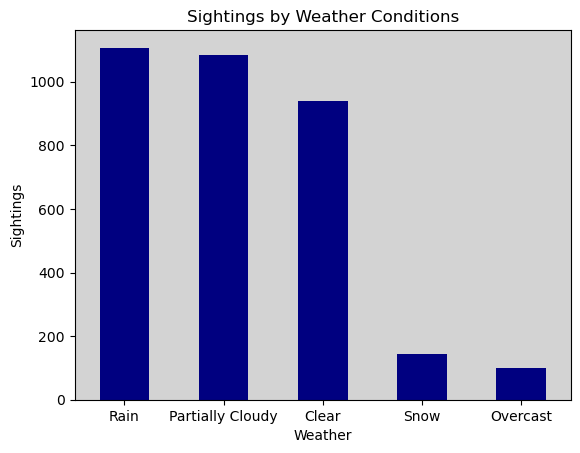

In [101]:
# Bar chart of sightings by weather condition
weatherBar1 = conditions['conditions'].value_counts().plot(kind = 'bar', title= 'Sightings by Weather Conditions',xlabel='Weather',ylabel='Sightings', color = 'navy')
plt.xticks([0, 1, 2, 3, 4], ['Rain', 'Partially Cloudy', 'Clear','Snow','Overcast'],
       rotation=0)
ax = plt.gca()
ax.set_facecolor('lightgrey')

r-squared: 0.031381870907596844


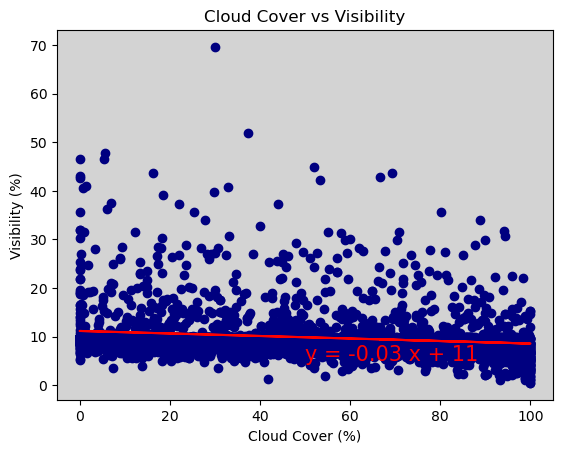

In [102]:
# Linear Regression of cloudiness vs visibility index
(slope,intercept,rvalue,pvalue,stderr) = stats.linregress(weatherData['cloud_cover'],weatherData['visibility'])
regressValues = weatherData['cloud_cover']*slope+intercept
lineEq = 'y = ' + str(round(slope,2)) + ' x + ' + str(round(intercept)) 
plt.scatter(weatherData['cloud_cover'],weatherData['visibility'],color = 'navy')
plt.title('Cloud Cover vs Visibility')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Visibility (%)')
plt.plot(weatherData['cloud_cover'],regressValues,"r-")
plt.annotate(lineEq,(50,5),fontsize = 15, color = 'red')
print(f'r-squared: {rvalue**2}')
ax = plt.gca()
ax.set_facecolor('lightgrey')
plt.show()

In [103]:
# Seperating out class A and class B
ClassA = weatherData.loc[weatherData['classification']=='Class A']
ClassB = weatherData.loc[weatherData['classification']=='Class B']
ClassC = weatherData.loc[weatherData['classification']=='Class C']

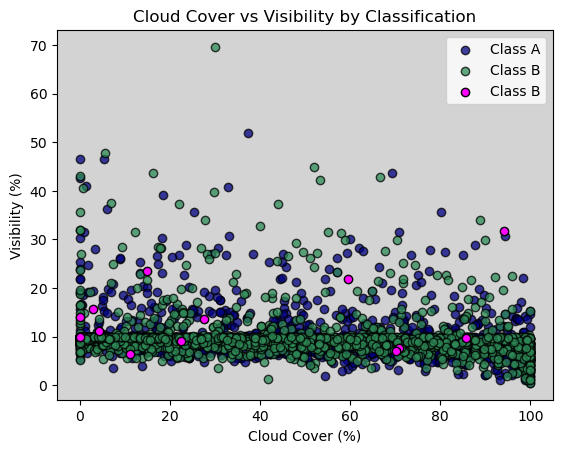

In [104]:
plt.scatter(ClassA['cloud_cover'],ClassA['visibility'],color = 'navy', label = 'Class A', alpha = 0.75, edgecolors = 'black')
plt.scatter(ClassB['cloud_cover'],ClassB['visibility'], color = 'seagreen', label = 'Class B',alpha = 0.75, edgecolors = 'black')
plt.scatter(ClassC['cloud_cover'],ClassC['visibility'], color = 'fuchsia', label = 'Class B',alpha = 1, edgecolors = 'black')
plt.legend()
plt.title('Cloud Cover vs Visibility by Classification')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Visibility (%)')
ax = plt.gca()
ax.set_facecolor('lightgrey')
plt.show()

In [105]:
# Using T-charts to look for difference in conditions between Class A and B
i = 1
pvalues = []
for col in range(1,12):
    pvalues.append(stats.ttest_ind(ClassA[weatherData.columns[i]],ClassB[weatherData.columns[i]],equal_var = False)[1])
    i+=1
tcharts = pd.DataFrame({'Weather': weatherData.columns[1:12],
                        'P-Value': pvalues})
tcharts

,Weather,P-Value
0,temperature_high,0.966640
1,temperature_mid,0.705411
2,temperature_low,0.323902
3,dew_point,0.061221
4,humidity,0.004087
5,cloud_cover,0.001894
6,moon_phase,0.911079
7,precip_intensity,0.112570
8,visibility,0.710068
9,precip_probability,0.893850


In [106]:
# Comparing summary statistics for significantly different conditions (p < 0.05) 
SigDiff = ['humidity','cloud_cover','pressure']

print('A:', ClassA[SigDiff].describe())
print('B:', ClassB[SigDiff].describe())

A:           humidity  cloud_cover     pressure
count  1662.000000  1662.000000  1662.000000
mean     69.568051    47.486643  1017.265223
std      14.554449    32.758362     6.097202
min      12.500000     0.000000   993.300000
25%      61.800000    16.700000  1013.600000
50%      71.200000    45.900000  1017.000000
75%      80.100000    76.500000  1020.600000
max      99.700000   100.000000  1039.000000
B:           humidity  cloud_cover     pressure
count  1699.000000  1699.000000  1699.000000
mean     68.060742    43.961507  1016.759388
std      15.842574    32.977073     6.057460
min       7.800000     0.000000   980.400000
25%      58.900000    13.500000  1013.200000
50%      70.700000    40.700000  1016.600000
75%      79.300000    73.650000  1020.300000
max     100.000000   100.000000  1042.200000
